# Analiza Sentiment leksikona -RNN



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a3.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,ID,Lemme,Vrsta,Definicija,POS,NEG,OBJ
0,ENG30-03574555-n,ustanova,n,zgrada u koji se nalaziti organizacioni jedini...,0.000003,0.000002,0.999996
1,ENG30-07810907-n,začin,n,pripremljen dodatak jela za poboljšanje ukus,0.000715,0.000252,0.999033
2,ENG30-00721431-n,mesto,n,"u nečiji prilika , mogućnost",0.005964,0.025355,0.968681
3,ENG30-00473799-v,"obnoviti,doterati,uglancati,uljuditi",v,ostati jesam još samo da se doterati neki fine...,0.001343,0.001773,0.996885
4,ENG30-00903385-v,oprostiti,v,zapad on jesam oprostiti što se nekada računat...,0.000353,0.000944,0.998703
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,mandat,n,mandat predsednik,0.190214,0.167100,0.642686
25316,ENG30-15266685-n,sredina,n,vreme između početak i kraj vremenski perioda,0.000039,0.000019,0.999942
25317,ENG30-15266911-n,"gotovo,konac,kraj,prestanak,svršetak,završetak",n,tačka u vreme kada se nešto završavati,0.000304,0.000201,0.999495
25318,ENG30-15276642-n,"b/s,bitova u sekundi",n,( računarstvo ) brzina prenos podatak ( npr . ...,0.000101,0.000048,0.999852


In [6]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema pozitivnom polaritetu 

In [7]:
# Define bin edges
bin_edges = [i/8 for i in range(9)]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)       0    0.000000
 [0.125, 0.25)      0    0.000000
 [0.25, 0.375)      1    0.003949
 [0.375, 0.5)     515    2.033965
 [0.5, 0.625)     697    2.752765
 [0.625, 0.75)   1001    3.953397
 [0.75, 0.875)   1519    5.999210
 [0.875, 1.0)   21587   85.256714,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   23289   91.978673
 [0.125, 0.25)   1849    7.302528
 [0.25, 0.375)    166    0.655608
 [0.375, 0.5)      16    0.063191
 [0.5, 0.625)       0    0.000000
 [0.625, 0.75)      0    0.000000
 [0.75, 0.875)      0    0.000000
 [0.875, 1.0)       0    0.000000,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23102   91.240126
 [0.125, 0.25)   1297    5.122433
 [0.25, 0.375)    763    3.013428
 [0.375, 0.5)     139    0.548973
 [0.5, 0.625)      19    0.075039
 [0.625, 0.75)      0    0.000000
 [0.75, 0.875)      0    

In [8]:
#turn results into dataframe

results_df = pd.concat(results, axis=1)

# rearange columns to POS, NEG, OBJ

results_df = results_df[['POS', 'NEG', 'OBJ']]
results_df



POS               NEG               OBJ           
               Count Percentage  Count Percentage  Count Percentage
[0.0, 0.125)   23289  91.978673  23102  91.240126      0   0.000000
[0.125, 0.25)   1849   7.302528   1297   5.122433      0   0.000000
[0.25, 0.375)    166   0.655608    763   3.013428      1   0.003949
[0.375, 0.5)      16   0.063191    139   0.548973    515   2.033965
[0.5, 0.625)       0   0.000000     19   0.075039    697   2.752765
[0.625, 0.75)      0   0.000000      0   0.000000   1001   3.953397
[0.75, 0.875)      0   0.000000      0   0.000000   1519   5.999210
[0.875, 1.0)       0   0.000000      0   0.000000  21587  85.256714

In [25]:
#copy to clipboard
results_df.to_clipboard()

: 

In [9]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

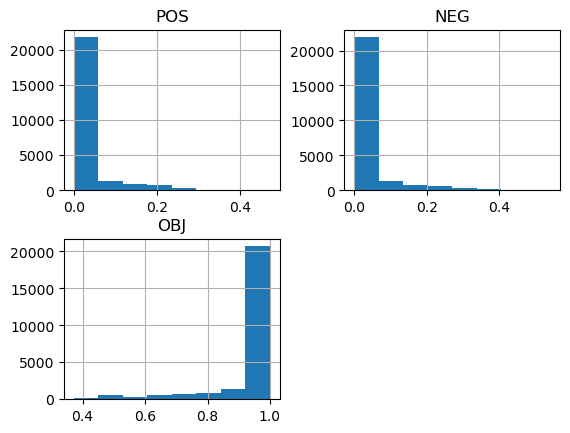

In [10]:
sent_an.hist(bins=8)

<Axes: >

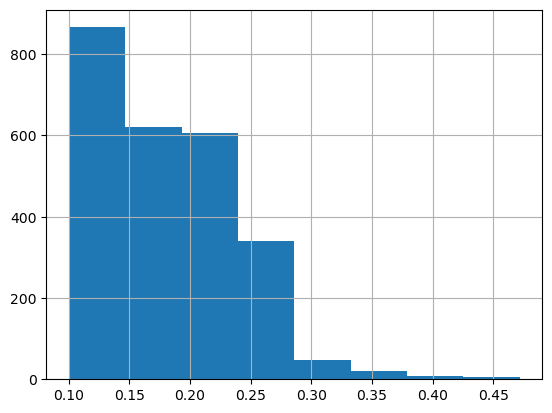

In [11]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

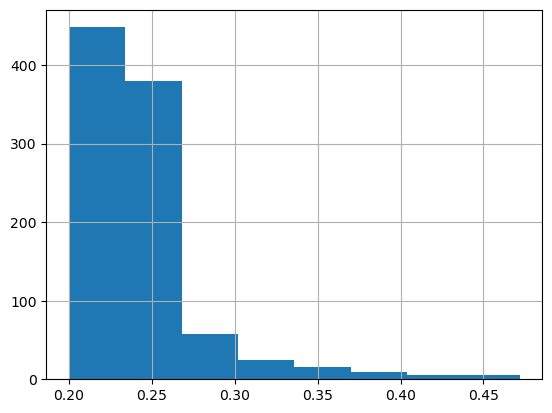

In [12]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

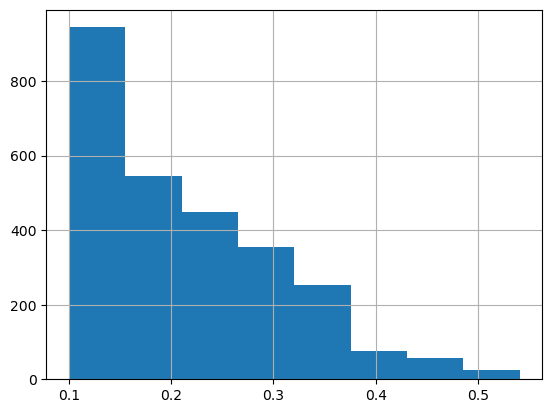

In [13]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

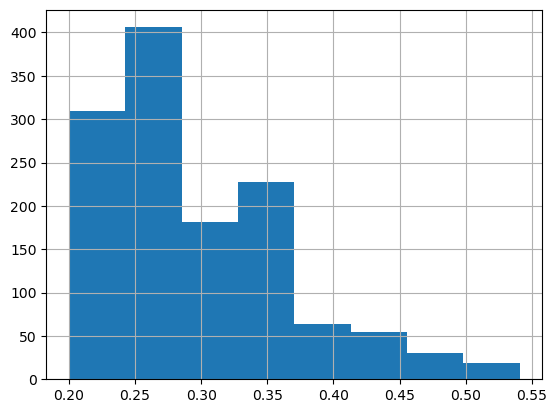

In [14]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [15]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

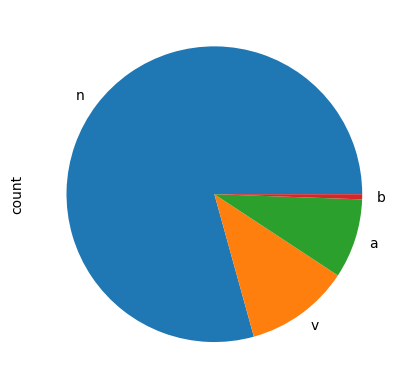

In [16]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

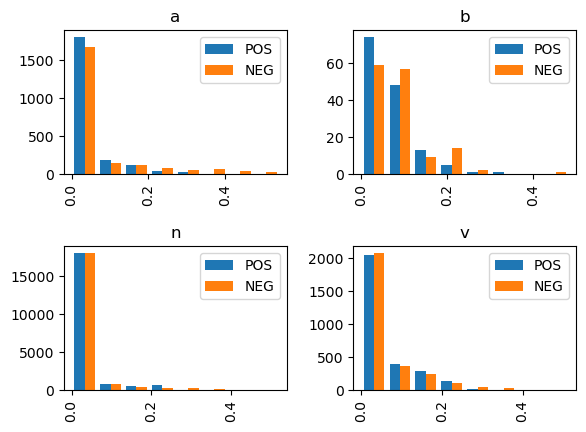

In [17]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

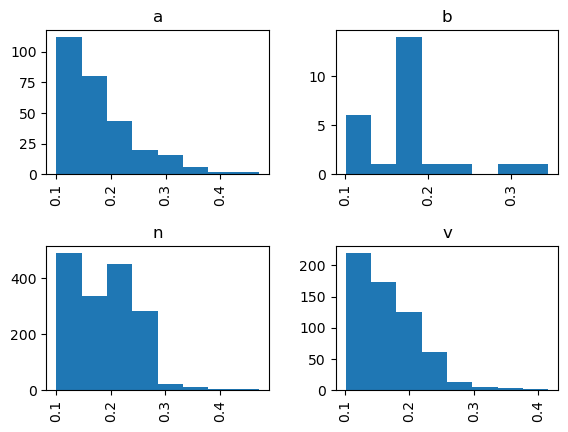

In [18]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

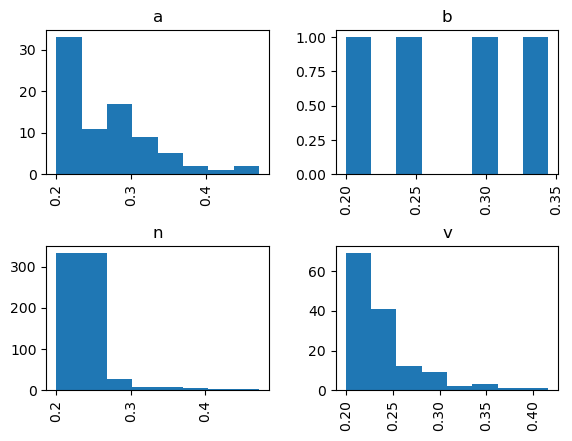

In [19]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

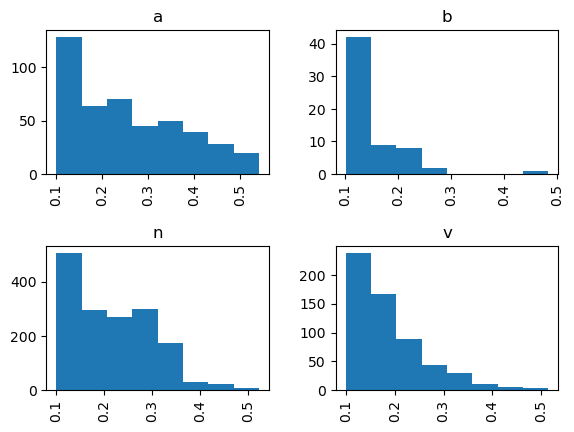

In [20]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

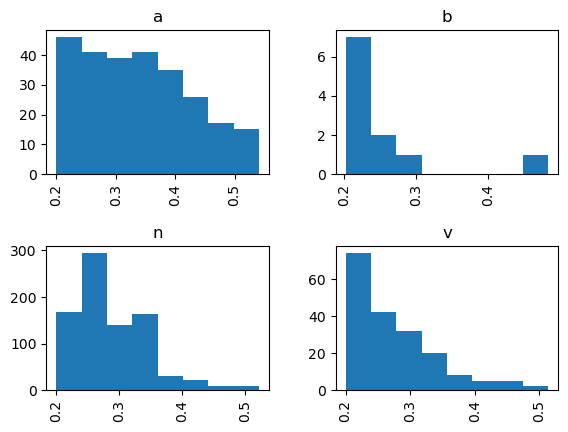

In [21]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

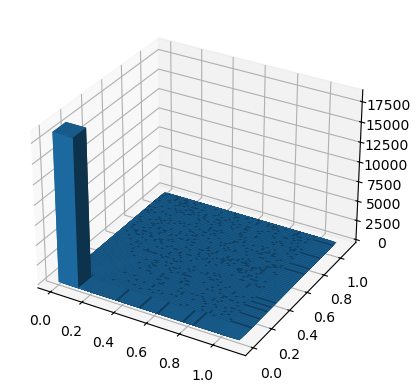

In [22]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

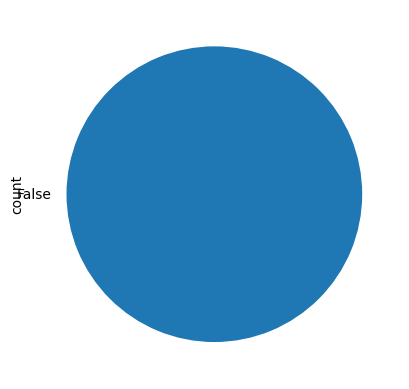

In [23]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

In [24]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs